In [1]:
from fastcore.all import *
from fastai.vision.all import *

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
data_dir = '/media/eleven/5ADB-FD62/data'

In [4]:
path = Path(data_dir)

In [5]:
plt_dis = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed = 42),
                 get_y = parent_label,
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

In [6]:
dls = plt_dis.dataloaders(path)

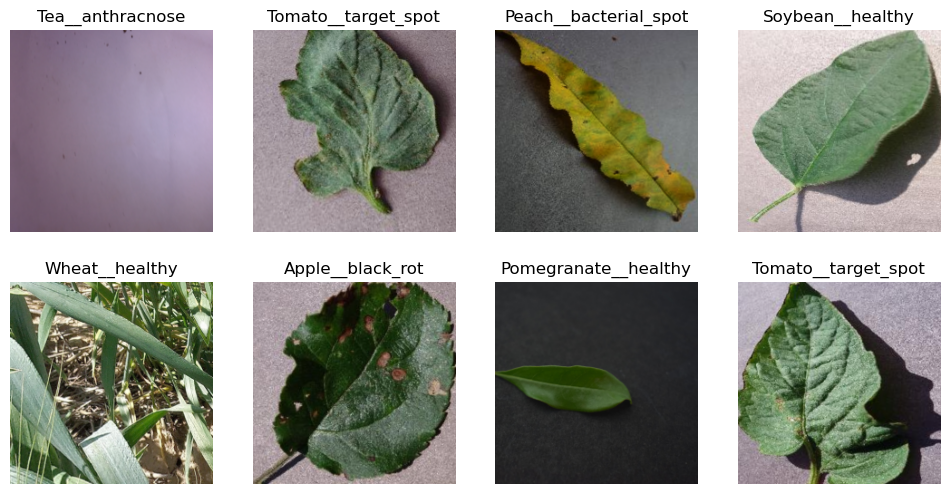

In [7]:
dls.show_batch(nrows = 2, ncols = 4)

### Resnet18

In [8]:
learn = vision_learner(dls, resnet18, metrics = accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.601880,0.375372,0.873996,08:31


epoch,train_loss,valid_loss,accuracy,time
0,0.305648,0.202621,0.930707,07:26
1,0.184389,0.143114,0.952014,07:00


In [9]:
interp1 = ClassificationInterpretation.from_learner(learn)

In [10]:
interp1.most_confused(min_val=5)

[('Soybean__diabrotica_speciosa', 'Soybean__caterpillar', 54),
 ('Rice__leaf_blast', 'Rice__healthy', 44),
 ('Rice__brown_spot', 'Rice__leaf_blast', 28),
 ('Corn__gray_leaf_spot', 'Corn__northern_leaf_blight', 26),
 ('Rice__brown_spot', 'Rice__healthy', 26),
 ('Soybean__caterpillar', 'Soybean__diabrotica_speciosa', 25),
 ('Cassava__bacterial_blight', 'Cassava__healthy', 24),
 ('Soybean__healthy', 'Soybean__caterpillar', 22),
 ('Cassava__brown_streak_disease', 'Cassava__healthy', 20),
 ('Soybean__caterpillar', 'Soybean__healthy', 20),
 ('Cassava__mosaic_disease', 'Cassava__green_mottle', 16),
 ('Cassava__brown_streak_disease', 'Cassava__bacterial_blight', 14),
 ('Cassava__green_mottle', 'Cassava__healthy', 14),
 ('Cassava__healthy', 'Cassava__bacterial_blight', 14),
 ('Rice__leaf_blast', 'Rice__brown_spot', 14),
 ('Soybean__diabrotica_speciosa', 'Soybean__healthy', 14),
 ('Cassava__green_mottle', 'Cassava__mosaic_disease', 12),
 ('Corn__northern_leaf_blight', 'Corn__gray_leaf_spot', 12)

### Resnet34

In [ ]:
import gc
import torch

def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()
    
clear_memory()

In [13]:
learn = vision_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.551366,0.359881,0.880445,06:51


epoch,train_loss,valid_loss,accuracy,time
0,0.283380,0.214355,0.928368,07:01
1,0.166653,0.126501,0.958462,07:07


In [14]:
interp2 = ClassificationInterpretation.from_learner(learn)

In [15]:
interp2.most_confused(min_val=5)

[('Soybean__diabrotica_speciosa', 'Soybean__caterpillar', 41),
 ('Rice__leaf_blast', 'Rice__healthy', 30),
 ('Soybean__caterpillar', 'Soybean__diabrotica_speciosa', 29),
 ('Corn__gray_leaf_spot', 'Corn__northern_leaf_blight', 24),
 ('Rice__brown_spot', 'Rice__healthy', 22),
 ('Cassava__bacterial_blight', 'Cassava__healthy', 20),
 ('Cassava__brown_streak_disease', 'Cassava__bacterial_blight', 20),
 ('Rice__brown_spot', 'Rice__leaf_blast', 20),
 ('Rice__leaf_blast', 'Rice__brown_spot', 19),
 ('Cassava__healthy', 'Cassava__brown_streak_disease', 16),
 ('Soybean__healthy', 'Soybean__caterpillar', 15),
 ('Coffee__red_spider_mite', 'Coffee__rust', 14),
 ('Tea__anthracnose', 'Tea__bird_eye_spot', 13),
 ('Cassava__green_mottle', 'Cassava__healthy', 12),
 ('Cassava__healthy', 'Cassava__bacterial_blight', 12),
 ('Corn__northern_leaf_blight', 'Corn__gray_leaf_spot', 12),
 ('Soybean__diabrotica_speciosa', 'Soybean__healthy', 12),
 ('Coffee__rust', 'Coffee__healthy', 11),
 ('Rice__healthy', 'Rice__

### Resnet50

In [ ]:
def clear_memory():
    gc.collect()
    torch.cuda.empty_cache()
    
clear_memory()

In [16]:
learn = vision_learner(dls, resnet50, metrics = accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.572570,0.345731,0.882152,07:24


epoch,train_loss,valid_loss,accuracy,time
0,0.247020,0.175033,0.943289,08:39
1,0.131001,0.114240,0.963204,10:02


In [17]:
interp3 = ClassificationInterpretation.from_learner(learn)

In [18]:
interp3.most_confused(min_val=5)

[('Soybean__diabrotica_speciosa', 'Soybean__caterpillar', 33),
 ('Rice__brown_spot', 'Rice__leaf_blast', 26),
 ('Rice__leaf_blast', 'Rice__healthy', 24),
 ('Soybean__caterpillar', 'Soybean__diabrotica_speciosa', 24),
 ('Coffee__red_spider_mite', 'Coffee__rust', 20),
 ('Rice__brown_spot', 'Rice__healthy', 20),
 ('Corn__gray_leaf_spot', 'Corn__northern_leaf_blight', 19),
 ('Cassava__green_mottle', 'Cassava__healthy', 17),
 ('Cassava__bacterial_blight', 'Cassava__healthy', 16),
 ('Cassava__healthy', 'Cassava__brown_streak_disease', 15),
 ('Soybean__caterpillar', 'Soybean__healthy', 15),
 ('Soybean__diabrotica_speciosa', 'Soybean__healthy', 15),
 ('Corn__northern_leaf_blight', 'Corn__gray_leaf_spot', 14),
 ('Rice__healthy', 'Rice__leaf_blast', 14),
 ('Tea__anthracnose', 'Tea__bird_eye_spot', 13),
 ('Cassava__brown_streak_disease', 'Cassava__bacterial_blight', 11),
 ('Cassava__healthy', 'Cassava__bacterial_blight', 11),
 ('Cassava__brown_streak_disease', 'Cassava__healthy', 10),
 ('Potato__